<a href="https://colab.research.google.com/github/srinivas365/Analytics_Vidya_loan_prediction/blob/master/analytics_vidya_loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
raw_train=pd.read_csv('train.csv')
raw_test=pd.read_csv('test.csv')
sub=pd.read_csv('sample_submission.csv')

In [0]:
raw_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
raw_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [0]:
print("Shape of train:",raw_train.shape)
print("Shape of test:",raw_test.shape)

Shape of train: (614, 13)
Shape of test: (367, 12)


In [0]:
df=pd.concat([raw_train,raw_test])
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [0]:
discrete=[var for var in df.columns if df[var].dtype!='O' and var!='Loan_Status' and df[var].nunique()<10]
continuous=[var for var in df.columns if df[var].dtype!='O' and var!='Loan_Status' and var not in discrete]

categorical=[var for var in df.columns if df[var].dtype=='O']

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))


There are 1 discrete variables
There are 4 continuous variables
There are 8 categorical variables


In [0]:
discrete

['Credit_History']

In [0]:
categorical

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [0]:
continuous

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


# Feature Engineering part-1

1. Replacing null values with 'Missing' label for categorical variables.
2. Replacing the null values for numerical with -999
3. LabelEncoding and onehotencoding

In [0]:
#categorical
df['Gender']=df.Gender.fillna(value='Missing')
df['Married']=df.Married.fillna(value='Missing')
df['Dependents']=df.Dependents.fillna(value='Missing')
df['Self_Employed']=df.Self_Employed.fillna(value='Missing')
#numerical
df['LoanAmount']=df.LoanAmount.fillna(value=-999)
df['Loan_Amount_Term']=df.Loan_Amount_Term.fillna(value=-999)
df['Credit_History']=df.Credit_History.fillna(value=-999)

In [0]:
X=df.drop(['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']
X_dum=pd.get_dummies(X,drop_first=True)
X_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          981 non-null    int64  
 1   CoapplicantIncome        981 non-null    float64
 2   LoanAmount               981 non-null    float64
 3   Loan_Amount_Term         981 non-null    float64
 4   Credit_History           981 non-null    float64
 5   Gender_Male              981 non-null    uint8  
 6   Gender_Missing           981 non-null    uint8  
 7   Married_No               981 non-null    uint8  
 8   Married_Yes              981 non-null    uint8  
 9   Dependents_1             981 non-null    uint8  
 10  Dependents_2             981 non-null    uint8  
 11  Dependents_3+            981 non-null    uint8  
 12  Dependents_Missing       981 non-null    uint8  
 13  Education_Not Graduate   981 non-null    uint8  
 14  Self_Employed_No         9

In [0]:
y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [0]:
train_X=X_dum.iloc[:614,:]
train_y=y[:614]

# test for submission
test_X=X_dum.iloc[614:,:]
test_y=y[614:]

In [0]:
test_X.shape

(367, 18)

# Model Building

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV

In [0]:
X_train,X_test,y_train,y_test=train_test_split(train_X,train_y,test_size=0.2,stratify=train_y)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (491, 18)
Shape of X_test: (123, 18)


In [0]:
y_train.value_counts()

Y    337
N    154
Name: Loan_Status, dtype: int64

In [0]:
y_test.value_counts()

Y    85
N    38
Name: Loan_Status, dtype: int64

In [0]:
model_scores={}

In [0]:
def build_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)
    
    model_name = type(model).__name__
    train_acc=accuracy_score(y_train,y_train_pred)
    test_acc=accuracy_score(y_test,y_pred)
    
    print(confusion_matrix(y_test,y_pred))

    print(classification_report(y_test,y_pred))
    


    
    print("Training accuracy: : ",train_acc)
    print("Testing  accuracy: : ",test_acc)
    
    cv_results=cross_val_score(model,X_train,y_train,cv=10,n_jobs=-1)
    print("Cross validation Log Loss:", cv_results.mean())

    cv_acc=cv_results.mean()
    model_scores.setdefault(model_name,[train_acc,test_acc,cv_acc])

    y_test=y_test.map({'Y':1,'N':0})
    y_pred=pd.Series(y_pred).map({'Y':1,'N':0})


    print("ROC_AUC-score:",roc_auc_score(y_test,y_pred))



# Logistic Regression

In [0]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
Xtr_std=std.fit_transform(X_train[['']])
Xte_std=std.transform(X_test)
lr=LogisticRegression()
build_model(lr,Xtr_std,Xte_std,y_train,y_test)

[[ 3 35]
 [ 8 77]]
              precision    recall  f1-score   support

           N       0.27      0.08      0.12        38
           Y       0.69      0.91      0.78        85

    accuracy                           0.65       123
   macro avg       0.48      0.49      0.45       123
weighted avg       0.56      0.65      0.58       123

Training accuracy: :  0.6985743380855397
Testing  accuracy: :  0.6504065040650406
Cross validation Log Loss: 0.6698775510204081


In [0]:
lr_preds=lr.predict(std.transform(test_X))

In [0]:
lr_preds

array(['Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

# SVC

In [0]:
svc=SVC()
build_model(svc,Xtr_std,Xte_std,y_train,y_test)

[[ 1 37]
 [ 3 82]]
              precision    recall  f1-score   support

           N       0.25      0.03      0.05        38
           Y       0.69      0.96      0.80        85

    accuracy                           0.67       123
   macro avg       0.47      0.50      0.43       123
weighted avg       0.55      0.67      0.57       123

Training accuracy: :  0.7331975560081466
Testing  accuracy: :  0.6747967479674797
Cross validation Log Loss: 0.6618367346938775
ROC_AUC-score: 0.4955108359133127


# DecisionTree

In [0]:
dt=DecisionTreeClassifier()
build_model(dt,X_train,X_test,y_train,y_test)

[[18 20]
 [24 61]]
              precision    recall  f1-score   support

           N       0.43      0.47      0.45        38
           Y       0.75      0.72      0.73        85

    accuracy                           0.64       123
   macro avg       0.59      0.60      0.59       123
weighted avg       0.65      0.64      0.65       123

Training accuracy: :  1.0
Testing  accuracy: :  0.6422764227642277
Cross validation Log Loss: 0.7330204081632653
ROC_AUC-score: 0.5956656346749226


In [0]:
dt.get_depth()

20

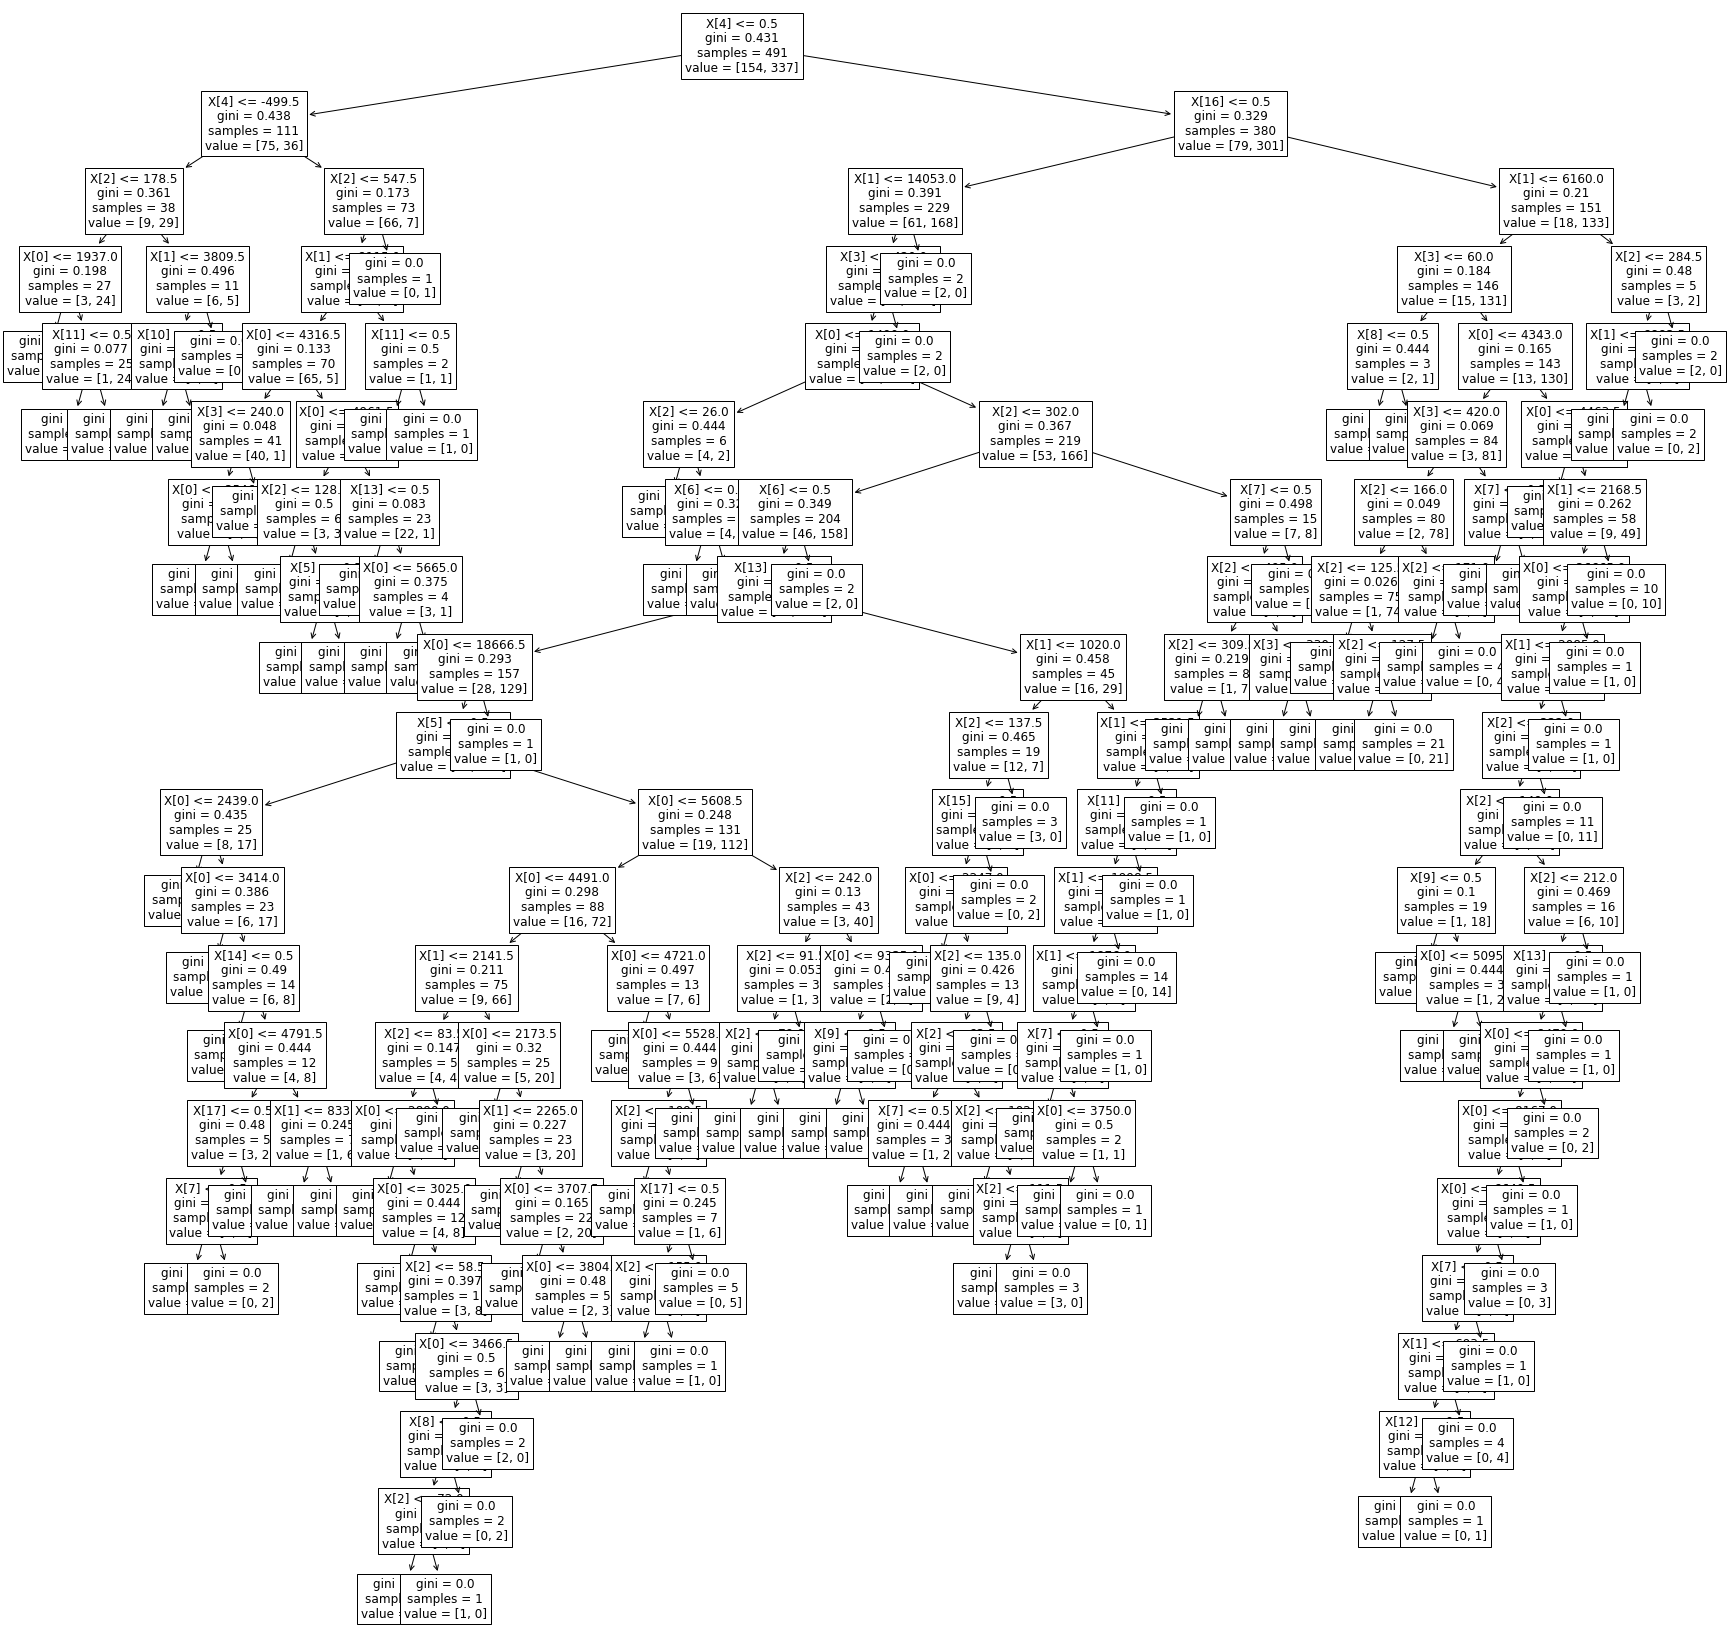

In [0]:
plt.figure(figsize=(30,30))
plot_tree(dt,fontsize=12)
plt.show()

In [0]:
dt_max_10=DecisionTreeClassifier(max_depth=10)
build_model(dt_max_10,X_train,X_test,y_train,y_test)

[[17 21]
 [15 70]]
              precision    recall  f1-score   support

           N       0.53      0.45      0.49        38
           Y       0.77      0.82      0.80        85

    accuracy                           0.71       123
   macro avg       0.65      0.64      0.64       123
weighted avg       0.70      0.71      0.70       123

Training accuracy: :  0.9164969450101833
Testing  accuracy: :  0.7073170731707317
Cross validation Log Loss: 0.7676326530612244
ROC_AUC-score: 0.6354489164086687


In [0]:
for mt in range(1,18):
    print("MAX Depth : ",mt)
    build_model(DecisionTreeClassifier(max_depth=mt,random_state=42),X_train,X_test,y_train,y_test)
    print('*'*50)

MAX Depth :  1
[[20 18]
 [ 8 77]]
              precision    recall  f1-score   support

           N       0.71      0.53      0.61        38
           Y       0.81      0.91      0.86        85

    accuracy                           0.79       123
   macro avg       0.76      0.72      0.73       123
weighted avg       0.78      0.79      0.78       123

Training accuracy: :  0.7657841140529531
Testing  accuracy: :  0.7886178861788617
Cross validation Log Loss: 0.7657142857142857
ROC_AUC-score: 0.7160990712074303
**************************************************
MAX Depth :  2
[[16 22]
 [ 0 85]]
              precision    recall  f1-score   support

           N       1.00      0.42      0.59        38
           Y       0.79      1.00      0.89        85

    accuracy                           0.82       123
   macro avg       0.90      0.71      0.74       123
weighted avg       0.86      0.82      0.79       123

Training accuracy: :  0.8065173116089613
Testing  accuracy: :  0.

In [0]:
dt_max_3=DecisionTreeClassifier(max_depth=3,random_state=42)
build_model(dt_max_3,X_train,X_test,y_train,y_test)

[[17 21]
 [ 2 83]]
              precision    recall  f1-score   support

           N       0.89      0.45      0.60        38
           Y       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123

Training accuracy: :  0.8167006109979633
Testing  accuracy: :  0.8130081300813008
Cross validation Log Loss: 0.7962857142857144
ROC_AUC-score: 0.7119195046439628


In [0]:
dt3_preds=dt_max_3.predict(test_X)
dt3_preds

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y

In [0]:
sub['Loan_Status']=dt3_preds
sub.to_csv('dt_md_3.csv',index=False)

In [0]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [0]:
for i in [0.2,0.4,0.6,0.8,1.0]:
    print("max_features:",i)
    build_model(DecisionTreeClassifier(max_depth=3,max_features=i,random_state=42),X_train,X_test,y_train,y_test)
    print("*"*50)

max_features: 0.2
[[16 22]
 [10 75]]
              precision    recall  f1-score   support

           N       0.62      0.42      0.50        38
           Y       0.77      0.88      0.82        85

    accuracy                           0.74       123
   macro avg       0.69      0.65      0.66       123
weighted avg       0.72      0.74      0.72       123

Training accuracy: :  0.7739307535641547
Testing  accuracy: :  0.7398373983739838
Cross validation Log Loss: 0.7289795918367347
ROC_AUC-score: 0.651702786377709
**************************************************
max_features: 0.4
[[16 22]
 [ 2 83]]
              precision    recall  f1-score   support

           N       0.89      0.42      0.57        38
           Y       0.79      0.98      0.87        85

    accuracy                           0.80       123
   macro avg       0.84      0.70      0.72       123
weighted avg       0.82      0.80      0.78       123

Training accuracy: :  0.8105906313645621
Testing  accuracy: 

In [0]:
dtmd_3_mf_06=DecisionTreeClassifier(max_depth=3,max_features=0.6,random_state=42)
build_model(dtmd_3_mf_06,X_train,X_test,y_train,y_test)

test_preds=dtmd_3_mf_06.predict(test_X)

sub['Loan_Status']=test_preds
sub.to_csv('dtmd_3_mf_06.csv',index=False)

[[18 20]
 [ 3 82]]
              precision    recall  f1-score   support

           N       0.86      0.47      0.61        38
           Y       0.80      0.96      0.88        85

    accuracy                           0.81       123
   macro avg       0.83      0.72      0.74       123
weighted avg       0.82      0.81      0.79       123

Training accuracy: :  0.814663951120163
Testing  accuracy: :  0.8130081300813008
Cross validation Log Loss: 0.8003673469387756
ROC_AUC-score: 0.7191950464396285


# RandomForestClassifier

In [0]:
rf=RandomForestClassifier(random_state=42)
build_model(rf,X_train, X_test, y_train, y_test)

[[18 20]
 [ 4 81]]
              precision    recall  f1-score   support

           N       0.82      0.47      0.60        38
           Y       0.80      0.95      0.87        85

    accuracy                           0.80       123
   macro avg       0.81      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123

Training accuracy: :  1.0
Testing  accuracy: :  0.8048780487804879
Cross validation Log Loss: 0.7718775510204081
ROC_AUC-score: 0.7133126934984519


In [0]:
test_preds=rf.predict(test_X)

sub['Loan_Status']=test_preds
sub.to_csv('simple_rf.csv',index=False)

In [0]:
for est in range(100,1000,100):
    print("Estimators:",est)
    build_model(RandomForestClassifier(random_state=42,max_depth=3,n_estimators=est), X_train, X_test, y_train, y_test)
    print("*"*50)

Estimators: 100
[[14 24]
 [ 2 83]]
              precision    recall  f1-score   support

           N       0.88      0.37      0.52        38
           Y       0.78      0.98      0.86        85

    accuracy                           0.79       123
   macro avg       0.83      0.67      0.69       123
weighted avg       0.81      0.79      0.76       123

Training accuracy: :  0.7983706720977597
Testing  accuracy: :  0.7886178861788617
Cross validation Log Loss: 0.7596326530612244
ROC_AUC-score: 0.6724458204334366
**************************************************
Estimators: 200
[[13 25]
 [ 1 84]]
              precision    recall  f1-score   support

           N       0.93      0.34      0.50        38
           Y       0.77      0.99      0.87        85

    accuracy                           0.79       123
   macro avg       0.85      0.67      0.68       123
weighted avg       0.82      0.79      0.75       123

Training accuracy: :  0.8004073319755601
Testing  accuracy: :  

In [0]:
for depth in range(1,20):
    print("max_depth:",depth)
    build_model(RandomForestClassifier(random_state=42,max_depth=depth,n_estimators=300), X_train, X_test, y_train, y_test)
    print("*"*50)

max_depth: 1
[[ 0 38]
 [ 0 85]]
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        38
           Y       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123

Training accuracy: :  0.6863543788187373
Testing  accuracy: :  0.6910569105691057


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross validation Log Loss: 0.6863673469387754
ROC_AUC-score: 0.5
**************************************************
max_depth: 2
[[ 1 37]
 [ 1 84]]
              precision    recall  f1-score   support

           N       0.50      0.03      0.05        38
           Y       0.69      0.99      0.82        85

    accuracy                           0.69       123
   macro avg       0.60      0.51      0.43       123
weighted avg       0.63      0.69      0.58       123

Training accuracy: :  0.7026476578411406
Testing  accuracy: :  0.6910569105691057
Cross validation Log Loss: 0.6986122448979593
ROC_AUC-score: 0.5072755417956656
**************************************************
max_depth: 3
[[15 23]
 [ 1 84]]
              precision    recall  f1-score   support

           N       0.94      0.39      0.56        38
           Y       0.79      0.99      0.88        85

    accuracy                           0.80       123
   macro avg       0.86      0.69      0.72       123
weighted

In [0]:
rfmd_5_est_300=RandomForestClassifier(random_state=42,max_depth=5,n_estimators=300)
build_model(rfmd_5_est_300, X_train, X_test, y_train, y_test)

test_preds=rfmd_5_est_300.predict(test_X)

sub['Loan_Status']=test_preds
sub.to_csv('rfmd_5_est_300.csv',index=False)

[[17 21]
 [ 2 83]]
              precision    recall  f1-score   support

           N       0.89      0.45      0.60        38
           Y       0.80      0.98      0.88        85

    accuracy                           0.81       123
   macro avg       0.85      0.71      0.74       123
weighted avg       0.83      0.81      0.79       123

Training accuracy: :  0.835030549898167
Testing  accuracy: :  0.8130081300813008
Cross validation Log Loss: 0.7962857142857143
ROC_AUC-score: 0.7119195046439628


<BarContainer object of 18 artists>

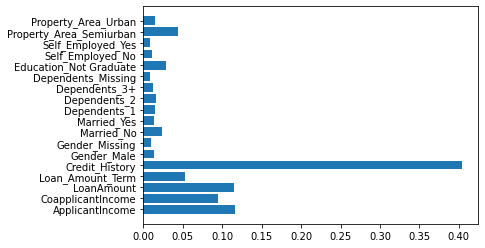

In [0]:
plt.barh(y=X_train.columns,width=rfmd_5_est_300.feature_importances_)

# GradientBoosting

In [0]:
gb=GradientBoostingClassifier(random_state=42)
build_model(gb, X_train, X_test, y_train, y_test)

test_preds=gb.predict(test_X)

sub['Loan_Status']=test_preds
sub.to_csv('gb.csv',index=False)

[[21 17]
 [ 8 77]]
              precision    recall  f1-score   support

           N       0.72      0.55      0.63        38
           Y       0.82      0.91      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.73      0.74       123
weighted avg       0.79      0.80      0.79       123

Training accuracy: :  0.9103869653767821
Testing  accuracy: :  0.7967479674796748
Cross validation Log Loss: 0.7656734693877549
ROC_AUC-score: 0.7292569659442724


# XGBOOST

In [0]:
xg=XGBClassifier(random_state=42)
build_model(xg, X_train, X_test, y_train, y_test)

test_preds=xg.predict(test_X)

sub['Loan_Status']=test_preds
sub.to_csv('xg_simple.csv',index=False)

[[19 19]
 [ 7 78]]
              precision    recall  f1-score   support

           N       0.73      0.50      0.59        38
           Y       0.80      0.92      0.86        85

    accuracy                           0.79       123
   macro avg       0.77      0.71      0.73       123
weighted avg       0.78      0.79      0.78       123

Training accuracy: :  0.869653767820774
Testing  accuracy: :  0.7886178861788617
Cross validation Log Loss: 0.767673469387755
ROC_AUC-score: 0.7088235294117646


In [0]:
test_check=X_test.copy()
test_check['predicted']=xg.predict(X_test)
test_check['acutal']=y_test

In [0]:
test_check[(test_check['acutal']=='N') & (test_check['predicted']=='Y')]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_Missing,Married_No,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Dependents_Missing,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,predicted,acutal
52,4230,0.0,112.0,360.0,1.0,0,0,1,0,0,0,0,0,0,1,0,1,0,Y,N
24,3717,2925.0,151.0,360.0,-999.0,1,0,0,1,1,0,0,0,0,0,0,1,0,Y,N
319,10000,0.0,155.0,360.0,1.0,1,0,0,1,1,0,0,0,0,0,1,0,0,Y,N
18,4887,0.0,133.0,360.0,1.0,1,0,0,1,0,0,0,0,1,1,0,0,0,Y,N
416,2600,0.0,160.0,360.0,1.0,0,0,1,0,1,0,0,0,0,1,0,0,1,Y,N
503,4050,5302.0,138.0,360.0,-999.0,1,0,0,1,1,0,0,0,1,1,0,0,0,Y,N
469,4333,2451.0,110.0,360.0,1.0,1,0,0,1,0,0,0,0,0,1,0,0,1,Y,N
447,3539,1376.0,55.0,360.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,Y,N
489,2435,0.0,75.0,360.0,1.0,1,0,1,0,0,0,0,0,0,1,0,0,1,Y,N
191,12000,0.0,164.0,360.0,1.0,1,0,1,0,0,0,0,0,0,1,0,1,0,Y,N


In [0]:
xg.feature_importances_

array([0.06204415, 0.05954689, 0.05607348, 0.060676  , 0.372506  ,
       0.043451  , 0.        , 0.07113596, 0.        , 0.0499041 ,
       0.03116252, 0.03028117, 0.        , 0.07550925, 0.02132848,
       0.        , 0.06366228, 0.00271875], dtype=float32)

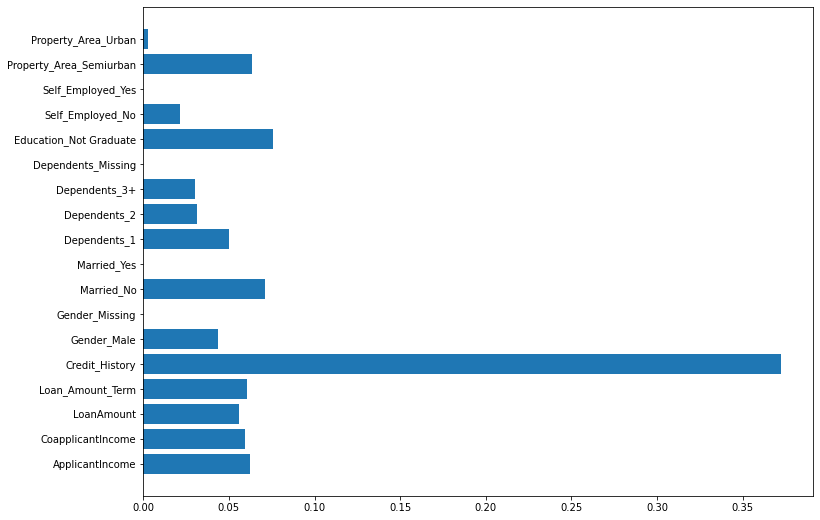

In [0]:
plt.figure(figsize=(12,9))
plt.barh(X_train.columns,xg.feature_importances_)
plt.show()

## Hyperparameter Tuning

In [0]:
xg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [0]:
xg_params={
    "learning_rate":[0.01,0.015,0.025,0.05,0.1],
    "gamma":[0.05,0.1,0.3,0.5,0.7,0.9,1.0],
    "max_depth":[3,5,7,9,12,15,17],
    "min_child_weight":[1,3,5,7],
    "subsample":[0.6,0.7,0.8,0.9,1.0],
    "colsample_bytree":[0.6,0.7,0.8,0.9,1.0],
    "reg_alpha":[0,0.01,0.1,1.0],
    "reg_lambda":[0.01,0.1,1.0]
}

In [0]:
xg_random=RandomizedSearchCV(xg,param_distributions=xg_params,n_iter=25,cv=10,n_jobs=-1,random_state=42)
xg_random.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=42, reg_alpha=0,
                                           reg_lambda=1,...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                              

In [0]:
xg_random.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.7,
 'learning_rate': 0.025,
 'max_depth': 9,
 'min_child_weight': 3,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.7}

In [0]:
xg_random.best_score_

0.8104897959183675

In [0]:
test_preds=xg_random.best_estimator_.predict(test_X)

sub['Loan_Status']=test_preds
sub.to_csv('xg_randomSearch.csv',index=False)